## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
intern=pd.read_csv(r"C:\Users\HP\Downloads\dataframe_.csv")
intern.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [3]:
intern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
intern.isnull().sum()

input     1
output    1
dtype: int64

In [5]:
df=intern.dropna()
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [6]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [7]:
exam=df.astype(float)
exam

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [8]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


In [9]:
exam.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

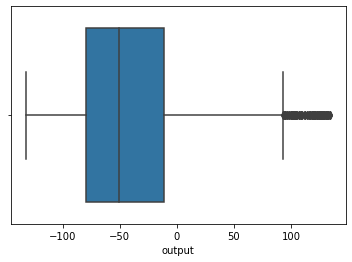

In [10]:
sns.boxplot(exam['output'])

In [11]:
q1=exam['output'].quantile(0.25)
q3=exam['output'].quantile(0.75)

In [12]:
iqr=q3-q1
iqr

69.02676665

In [13]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr

In [14]:
exam[exam['output']>upper]

,input,output
339,114.231059,100.493107
341,94.668251,103.818413
342,114.633331,94.000000
343,103.616817,109.965262
345,131.909580,94.636289
...,...,...
1470,133.101515,133.793116
1471,124.633331,129.000000
1472,121.060076,126.750385
1473,133.024034,132.055270


In [15]:
exam[exam['output']>lower]

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [16]:
new_df=exam[exam['output']>upper]
new_df

,input,output
339,114.231059,100.493107
341,94.668251,103.818413
342,114.633331,94.000000
343,103.616817,109.965262
345,131.909580,94.636289
...,...,...
1470,133.101515,133.793116
1471,124.633331,129.000000
1472,121.060076,126.750385
1473,133.024034,132.055270


C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

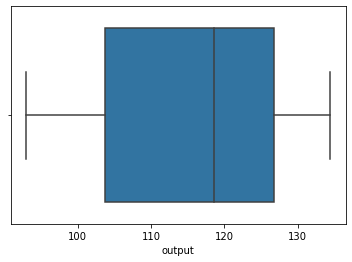

In [17]:
sns.boxplot(new_df['output'])

## the target variable is 'output'. it is available in the historical data so it comes under supervised learning.and the output is of numerical values so regression tasks will be performed

In [20]:
X=new_df[['input']]
y=new_df['output']

In [21]:
X.head()

,input
339,114.231059
341,94.668251
342,114.633331
343,103.616817
345,131.909580


In [22]:
y.head()

339    100.493107
341    103.818413
342     94.000000
343    109.965262
345     94.636289
Name: output, dtype: float64

## splitting the data into train and test using 75:25 split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(108, 1) (108,)
(36, 1) (36,)


In [24]:
X_train

,input
1064,116.633331
1093,-122.813233
496,101.452547
1096,-124.366669
1046,130.509024
...,...
352,111.921765
1091,-124.366669
1055,98.209265
1105,-112.018496


In [25]:
y_train

1064    118.000000
1093    117.690062
496     102.749520
1096    121.000000
1046    113.870678
           ...    
352     107.292979
1091    121.000000
1055    111.476958
1105    121.096397
485     103.561859
Name: output, Length: 108, dtype: float64

## rescaling the numerical train data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_transformed.head()

,input
1064,0.617146
1093,-1.623452
496,0.475093
1096,-1.637988
1046,0.746986


In [27]:
X_train_transformed.describe()

,input
count,1.080000e+02
mean,-6.167906e-18
std,1.004662e+00
min,-1.712778e+00
25%,-1.519011e+00
50%,5.774370e-01
75%,6.545752e-01
max,7.853209e-01


In [28]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [50.68066212]
Std of each column: [106.86727946]


## preparing the test data

In [29]:
X_test

,input
350,117.633331
1077,-106.093619
1085,-110.784447
462,117.759766
1098,-130.878119
1457,115.633331
1043,99.686242
456,112.633331
1458,122.321018
359,133.101515


In [30]:
y_test

350     107.000000
1077    118.532422
1085    128.940195
462      94.799505
1098    124.317133
1457    101.000000
1043     96.379324
456     100.000000
1458    102.401532
359     133.793116
1454    109.965262
1108    127.197394
478     115.438049
483     127.574391
492     107.545081
471      95.910993
460     103.000000
351     116.327499
1456     94.636289
489     126.899744
1074    131.000000
1104    126.797385
475     128.589413
1084    131.000000
481     115.367603
1102    124.699202
1050    118.351009
1471    129.000000
1089    131.000000
361     126.750385
1059    105.609348
464     103.000000
1472    126.750385
342      94.000000
1044     95.000000
353      92.927819
Name: output, dtype: float64

## rescaling the numerical test data

In [31]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_transformed.head()

,input
350,0.626503
1077,-1.467000
1085,-1.510894
462,0.627686
1098,-1.698918


## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [33]:
y_test_pred = regressor.predict(X_test_transformed)

In [34]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
350,107.000000,113.036241
1077,118.532422,124.085250
1085,128.940195,124.316912
462,94.799505,113.029997
1098,124.317133,125.309261


<AxesSubplot:xlabel='output', ylabel='Count'>

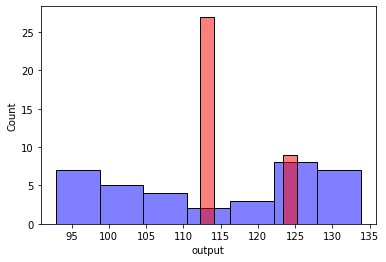

In [35]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [36]:
from sklearn import metrics

lg_acc=metrics.mean_absolute_error(y_test, y_test_pred)
print(lg_acc)
lg_square=metrics.mean_squared_error(y_test, y_test_pred)
print(lg_square)
lg_root=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
lg_root

10.13999336840356
142.53354720013573


11.938741441212962

## KNN Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [38]:
y_test_pred = regressor.predict(X_test_transformed)

In [39]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
350,107.000000,111.508964
1077,118.532422,127.461850
1085,128.940195,127.461850
462,94.799505,112.308964
1098,124.317133,121.958087


<AxesSubplot:xlabel='output', ylabel='Count'>

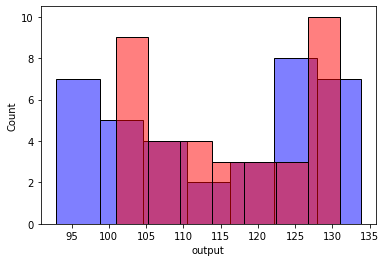

In [40]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [41]:
knn_acc=metrics.mean_absolute_error(y_test, y_test_pred)
print(knn_acc)

knn_square=metrics.mean_squared_error(y_test, y_test_pred)
print(knn_square)

knn_root=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
knn_root

8.08297893927778
125.18441054196393


11.188583938191817

## Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [43]:
y_test_pred = regressor.predict(X_test_transformed)

In [44]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
350,107.000000,107.00000
1077,118.532422,123.08795
1085,128.940195,123.08795
462,94.799505,107.00000
1098,124.317133,121.26611


<AxesSubplot:xlabel='output', ylabel='Count'>

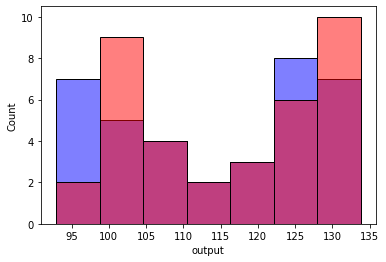

In [45]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [46]:
dt_acc=metrics.mean_absolute_error(y_test, y_test_pred)
print(dt_acc)

dt_square=metrics.mean_squared_error(y_test, y_test_pred)
print(dt_square)

dt_root=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(dt_root)

6.523916814166666
117.36764631081935
10.833634953736412


## Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [48]:
y_test_pred = regressor.predict(X_test_transformed)

In [49]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
350,107.000000,107.145619
1077,118.532422,124.866462
1085,128.940195,124.866462
462,94.799505,107.325619
1098,124.317133,119.788928


<AxesSubplot:xlabel='output', ylabel='Count'>

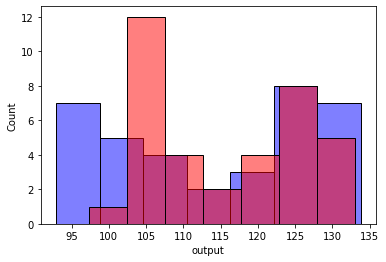

In [50]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [51]:
rf_acc=metrics.mean_absolute_error(y_test, y_test_pred)
print('mean_absolute_error:',rf_acc)


rf_square=metrics.mean_squared_error(y_test, y_test_pred)
print('mean squared error:',rf_square)

rf_root=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('root mean squared error:',rf_root)

mean_absolute_error: 6.823032285826449
mean squared error: 98.53421064563082
root mean squared error: 9.926439978442968


## Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [53]:
y_test_pred = regressor.predict(X_test_transformed)

In [54]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
350,107.000000,109.280469
1077,118.532422,123.126327
1085,128.940195,123.126327
462,94.799505,109.280469
1098,124.317133,121.999009


<AxesSubplot:xlabel='output', ylabel='Count'>

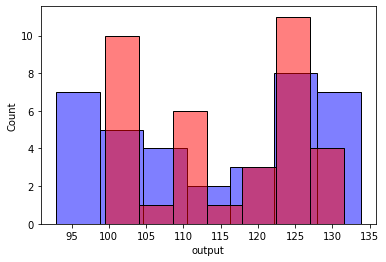

In [55]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [56]:
gbdt_acc=metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ',gbdt_acc)
gbdt_square=metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error: ',gbdt_square) 
gbdt_root=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ',gbdt_root) 

Mean Absolute Error:  6.840656792182279
Mean Squared Error:  95.40447946040605
Root Mean Squared Error:  9.767521664189236


## Support Vector Regression

In [57]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [58]:
y_test_pred = regressor.predict(X_test_transformed)

In [59]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
350,107.000000,112.227396
1077,118.532422,123.127108
1085,128.940195,123.193012
462,94.799505,112.232972
1098,124.317133,123.183862


<AxesSubplot:xlabel='output', ylabel='Count'>

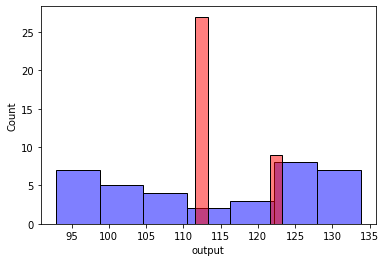

In [60]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [61]:
sv_acc=metrics.mean_absolute_error(y_test, y_test_pred)
print('mean absolute error:',sv_acc)

sv_square=metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error: ', sv_square)

sv_root=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', sv_root)

mean absolute error: 10.089658272629661
Mean Squared Error:  136.56167509046233
Root Mean Squared Error:  11.685960597677125


## preparing the final output of all regression models

In [62]:
data=[['linear regression',lg_acc,lg_square,lg_root],['KNN regression',knn_acc,knn_square,knn_root],
      ['DT regression',dt_acc,dt_square,dt_root],['Rnadom forest regression',rf_acc,rf_square,rf_root],
      ['GBDT Regression',gbdt_acc,gbdt_square,gbdt_root],['Support vector Regression',sv_acc,sv_square,sv_root]]

output=pd.DataFrame(data,columns=['regression','error','mean squared error','root mean squared error']) 
output

,regression,error,mean squared error,root mean squared error
0,linear regression,10.139993,142.533547,11.938741
1,KNN regression,8.082979,125.184411,11.188584
2,DT regression,6.523917,117.367646,10.833635
3,Rnadom forest regression,6.823032,98.534211,9.926440
4,GBDT Regression,6.840657,95.404479,9.767522
5,Support vector Regression,10.089658,136.561675,11.685961


# Observation

# After performing all the models we can observe that Decision tree regression model is the best algorithm to predict the output as it is giving the least mean score error of 6.52
